# Data Project - Stock Market Analysis


Welcome to Stock Market Analysis data project! In this project we will be looking at data from the stock market, particularly some technology stocks. We will use pandas to get stock information, visualize different aspects of it, and finally we will analyze the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Monte Carlo method!

We'll be answering the following questions along the way:

1.) What was the change in price of the stock over time?
2.) What was the daily return of the stock on average?
3.) What was the moving average of the various stocks?
4.) What was the correlation between different stocks' closing prices?
4.) What was the correlation between different stocks' daily returns?
5.) How much value do we put at risk by investing in a particular stock?
6.) How can we attempt to predict future stock behavior?


Basic Analysis of Stock Information

In this section we'll handle requesting stock information with pandas, and analyze basic attributes of a stock.

In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [5]:
from pandas_datareader import data
from datetime import datetime
from __future__ import division

In [12]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [13]:
end = datetime.now()

start = datetime(end.year-1,end.month,end.day)

In [21]:
#globals() is making the variable global. Note: Using globals() is a sloppy way of setting the DataFrame names, but its simple.

for stock in tech_list:
    globals()[stock] = data.DataReader(stock,'yahoo',start,end)

In [25]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-08-31,131.000000,126.000000,127.580002,129.039993,225702700.0,128.215347
2020-09-01,134.800003,130.529999,132.759995,134.179993,151948100.0,133.322495
2020-09-02,137.979996,127.000000,137.589996,131.399994,200119000.0,130.560257
2020-09-03,128.839996,120.500000,126.910004,120.879997,257599600.0,120.107483
2020-09-04,123.699997,110.889999,120.070000,120.959999,332607200.0,120.186981


In [26]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,130.038572,126.992778,128.574524,128.545079,1.058603e+08,128.107818
std,10.579252,10.885578,10.663056,10.825088,4.334697e+07,10.974145
min,110.190002,103.099998,104.540001,106.839996,4.639770e+07,106.157211
25%,122.042498,118.949999,120.475000,120.679998,7.670545e+07,120.136076
50%,128.585007,126.165001,127.650002,127.329998,9.513970e+07,127.139507
75%,135.995003,133.522495,135.012497,134.555000,1.210929e+08,134.113113
max,153.490005,149.149994,150.229996,153.119995,3.326072e+08,153.119995


In [27]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2020-08-31 to 2021-08-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       252 non-null    float64
 1   Low        252 non-null    float64
 2   Open       252 non-null    float64
 3   Close      252 non-null    float64
 4   Volume     252 non-null    float64
 5   Adj Close  252 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


<AxesSubplot:xlabel='Date'>

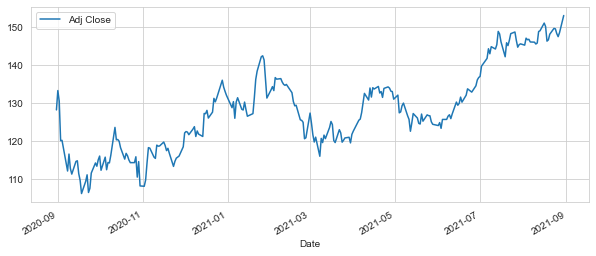

In [29]:
#Plotting closing price over last year for Apple Stocks.

AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

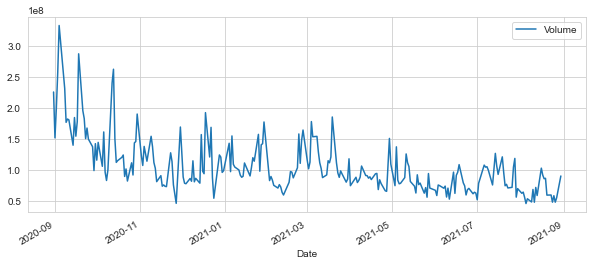

In [30]:
#Plotting volume traded each day over last year for Apple Stocks.

AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [93]:
#Plotting Moving Average

ma_day = [10,20,50]

for ma in ma_day:
    column_name="MA for %s days" %(str(ma))
    
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()

<AxesSubplot:xlabel='Date'>

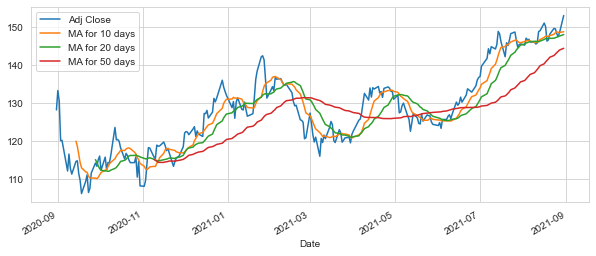

In [35]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))


Section 2 - Daily Return Analysis

We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. We'll use pandas to retrieve the daily returns for the Apple stock.


<AxesSubplot:xlabel='Date'>

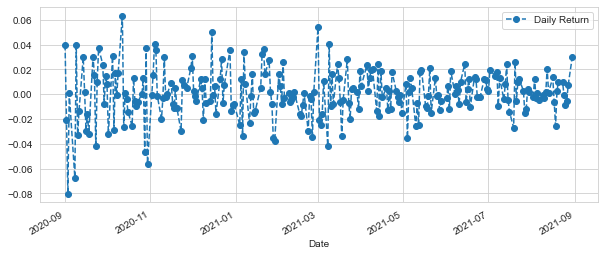

In [36]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

C:\Users\Himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

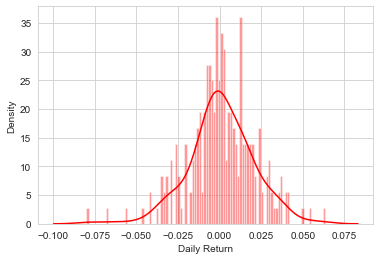

In [39]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='Red')

<AxesSubplot:>

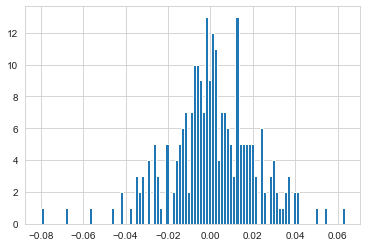

In [40]:
AAPL['Daily Return'].hist(bins=100)

In [41]:
closing_df = data.DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [42]:
closing_df

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-08-31,128.215347,1634.180054,223.479355,3450.959961
2020-09-01,133.322495,1660.709961,225.203552,3499.120117
2020-09-02,130.560257,1728.280029,229.543701,3531.449951
2020-09-03,120.107483,1641.839966,215.324188,3368.000000
2020-09-04,120.186981,1591.040039,212.301926,3294.620117
...,...,...,...,...
2021-08-24,149.619995,2847.969971,302.619995,3305.780029
2021-08-25,148.360001,2859.000000,302.010010,3299.179932
2021-08-26,147.539993,2842.459961,299.089996,3316.000000


In [43]:
tech_rets = closing_df.pct_change()

In [44]:
tech_rets

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-08-31,NaN,NaN,NaN,NaN
2020-09-01,0.039833,0.016234,0.007715,0.013956
2020-09-02,-0.020718,0.040687,0.019272,0.009239
2020-09-03,-0.080061,-0.050015,-0.061947,-0.046284
2020-09-04,0.000662,-0.030941,-0.014036,-0.021787
...,...,...,...,...
2021-08-24,-0.000601,0.009206,-0.006663,0.012220
2021-08-25,-0.008421,0.003873,-0.002016,-0.001997
2021-08-26,-0.005527,-0.005785,-0.009669,0.005098


C:\Users\Himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


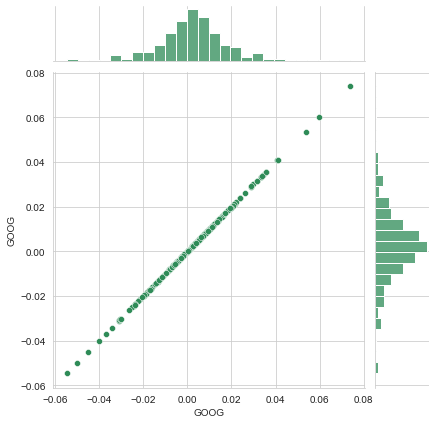

In [46]:
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

C:\Users\Himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


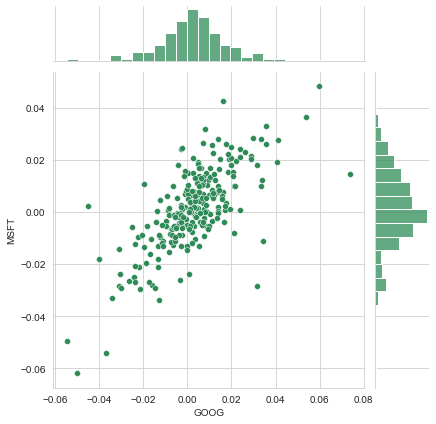

In [47]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter',color='seagreen')

In [48]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-08-31,NaN,NaN,NaN,NaN
2020-09-01,0.039833,0.016234,0.007715,0.013956
2020-09-02,-0.020718,0.040687,0.019272,0.009239
2020-09-03,-0.080061,-0.050015,-0.061947,-0.046284
2020-09-04,0.000662,-0.030941,-0.014036,-0.021787


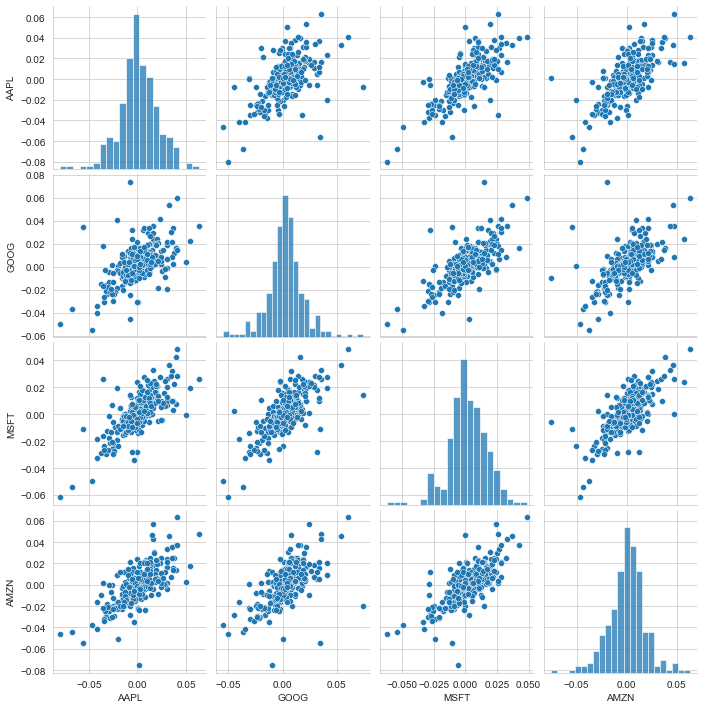

In [49]:
sns.pairplot(tech_rets.dropna())

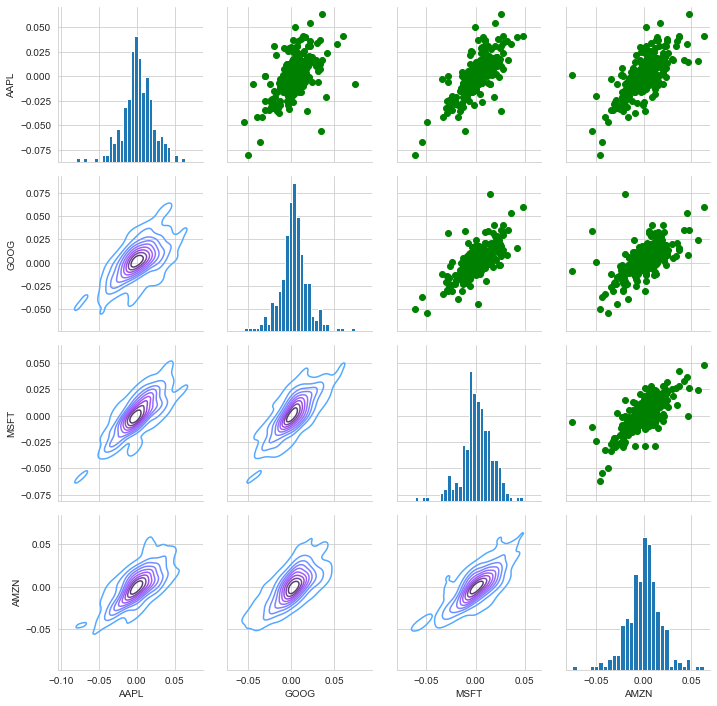

In [51]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter,color='green')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

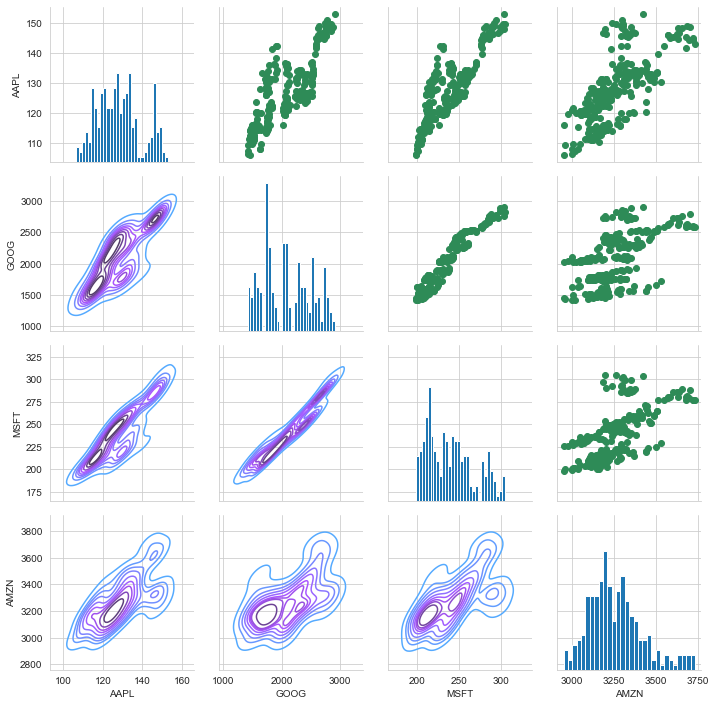

In [54]:
returns_fig = sns.PairGrid(closing_df.dropna())

returns_fig.map_upper(plt.scatter,color='seagreen')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

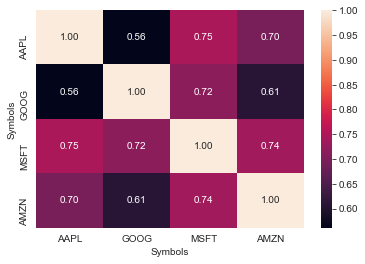

In [59]:
sns.heatmap(tech_rets.dropna().corr(),annot=True,fmt='.2f')

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

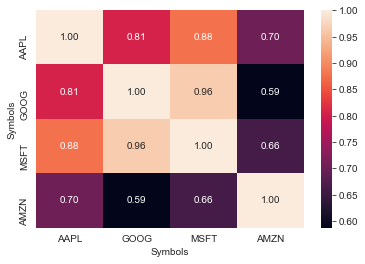

In [60]:
sns.heatmap(closing_df.corr(),annot=True,fmt = '.2f')

In [61]:
rets = tech_rets.dropna()

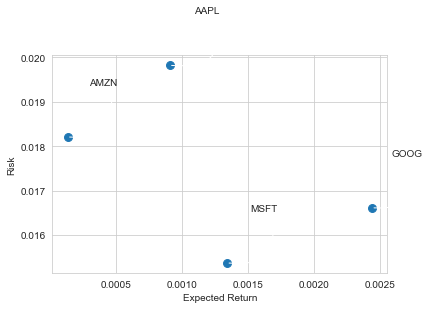

In [69]:
area = np.pi*20

plt.scatter(rets.mean(),rets.std(),s = area)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label,x,y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
    label,
    xy=(x,y), xytext = (50,50),
    textcoords = 'offset points', ha = 'right', va='bottom',
    arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.9'))

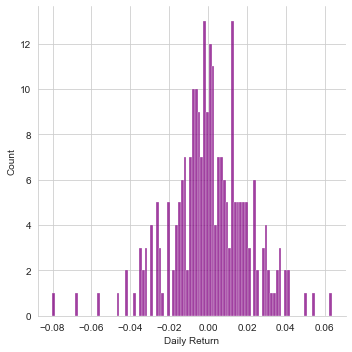

In [72]:
sns.displot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [73]:
rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-09-01,0.039833,0.016234,0.007715,0.013956
2020-09-02,-0.020718,0.040687,0.019272,0.009239
2020-09-03,-0.080061,-0.050015,-0.061947,-0.046284
2020-09-04,0.000662,-0.030941,-0.014036,-0.021787
2020-09-08,-0.067295,-0.036863,-0.054096,-0.043944


In [74]:
rets['AAPL'].quantile(0.05)

-0.03246292298239756

In [85]:
days = 365

dt = 1/days

mu = rets.mean()['GOOG']

sigma = rets.std()['GOOG']

In [86]:
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        
        shock[x] = np.random.normal(loc=mu*dt,scale = sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
    
    return price
    

In [87]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-08-31,1647.964966,1630.310059,1647.890015,1634.180054,1823400,1634.180054
2020-09-01,1665.729980,1632.219971,1636.630005,1660.709961,1825300,1660.709961
2020-09-02,1733.180054,1666.329956,1673.775024,1728.280029,2511200,1728.280029
2020-09-03,1709.713989,1615.060059,1709.713989,1641.839966,3107800,1641.839966
2020-09-04,1645.109985,1547.613037,1624.260010,1591.040039,2608600,1591.040039


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

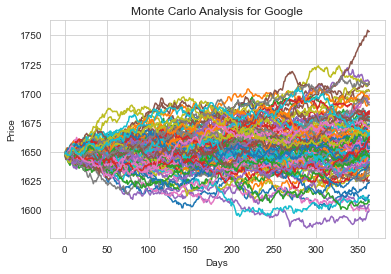

In [88]:
start_price = 1647.89

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [90]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]
    

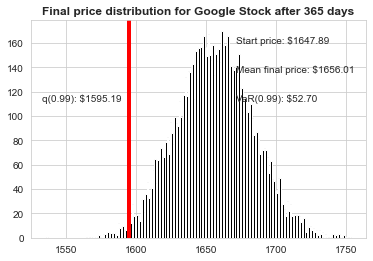

In [92]:
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200,color='black')

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');